In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cleaned_data.csv")
print(df.head)
print(df['Puck_cen_Y'][0])

<bound method NDFrame.head of                File Name     Time  Puck_XL  Puck_YL  Puck_XH  Puck_YH  \
0      image_0000245.jpg  47:11.6   363.99   215.14   379.56   240.30   
1      image_0000246.jpg  47:11.6   362.52   211.36   378.83   237.93   
2      image_0000247.jpg  47:11.6   362.01   210.00   378.07   236.72   
3      image_0000248.jpg  47:11.7   361.32   208.75   376.40   235.83   
4      image_0000249.jpg  47:11.7   359.97   208.73   375.24   235.74   
...                  ...      ...      ...      ...      ...      ...   
16141  image_0026621.jpg  24:45.2   192.17   295.69   208.13   324.05   
16142  image_0026622.jpg  24:45.3   196.24   262.95   212.74   289.41   
16143  image_0026623.jpg  24:45.3   202.34   227.65   218.52   255.09   
16144  image_0026624.jpg  24:45.4   203.92   209.74   222.52   237.40   
16145  image_0026625.jpg  31:35.7   210.80   172.93   227.70   202.34   

       Table_XL  Table_YL  Table_XH  Table_YH  Puck_cen_X  Puck_cen_Y  \
0        82.216    1

Create cross left / cross rigjt

In [ ]:
prev_left=0
prev_right=0
for i in range(df.shape[0]-1):
   #direction
   if df['Puck_cen_X'][i] < df['Puck_cen_X'][i+1]:
      df['direction'][i] = 1
   elif df['Puck_cen_X'][i] > df['Puck_cen_X'][i+1]:
      df['direction'][i] = -1

   # future bounce
   if df['Puck_cen_X'][i] == 0:
      for j in range(prev_left, (i+1)):
         df['Cross_Left'][j] = df['Puck_cen_Y'][i]
      prev_left = i

   elif df['Puck_cen_X'][i] > 0 and df['Puck_cen_X'][i+1] < 0:
      for j in range(prev_left+1, (i+1)):
         weighted_avg = df['Puck_cen_X'][i] / (df['Puck_cen_X'][i] - df['Puck_cen_X'][i+1]) # i+1 is negative
         if(weighted_avg >1):
            print('error!')
         cross =(1-weighted_avg) * df['Puck_cen_Y'][i] + weighted_avg * df['Puck_cen_Y'][i+1]
         df['Cross_Left'][j] = cross
      prev_left = i
 
   elif df['Puck_cen_X'][i] == 1:
      for j in range(prev_right, (i+1)):
         df['Cross_right'][j] = df['Puck_cen_Y'][i]
      prev_right = i

   elif df['Puck_cen_X'][i] < 1 and df['Puck_cen_X'][i+1] > 1:
      for j in range(prev_right+1, (i+1)):
         weighted_avg = (1-df['Puck_cen_X'][i]) / (df['Puck_cen_X'][i+1] - df['Puck_cen_X'][i]) # where is 1 with respect to i and i+1
         cross = (1-weighted_avg) * df['Puck_cen_Y'][i] + weighted_avg * df['Puck_cen_Y'][i+1]
         df['Cross_right'][j] = cross
      prev_right = i

df.to_csv(path_or_buf='cleaned_data.csv',index=False)
print(df.head)

Count Crosses

In [10]:
count_L = 0
count_R = 0
for i in range(df.shape[0]-1):
    if df['Puck_cen_X'][i] > 0 and df['Puck_cen_X'][i+1] < 0:
        count_L+=1

    elif df['Puck_cen_X'][i] < 1 and df['Puck_cen_X'][i+1] > 1:
        count_R +=1
print(count_L, count_R, count_L+count_R)

310 338 648


Flip Horizontal

In [8]:
df = pd.read_csv("cleaned_data.csv")
df_flip = df
df_flip['Puck_cen_X'] = 1-df['Puck_cen_X']
df_flip['direction'] = -df['direction']

'''df_flip['Cross_right'] = df['Cross_Left']
df_flip['Cross_Left'] = df['Cross_right']'''

df_flip.to_csv(path_or_buf='cleaned_data_flipped.csv',index=False)



In [2]:
df = pd.read_csv("Combined_numerated.csv")
j=0
for i in reversed(range(df.shape[0]-1)):
    if df['Cross_Left'][i] != df['Cross_Left'][i+1]:
        j=0
    else:
        j+=1
    df['Count'][i] = j

df.to_csv(path_or_buf='Combined_numerated.csv', index=False)

C:\Users\Quinn Leydon\AppData\Local\Temp\ipykernel_21508\1400241378.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count'][i] = j


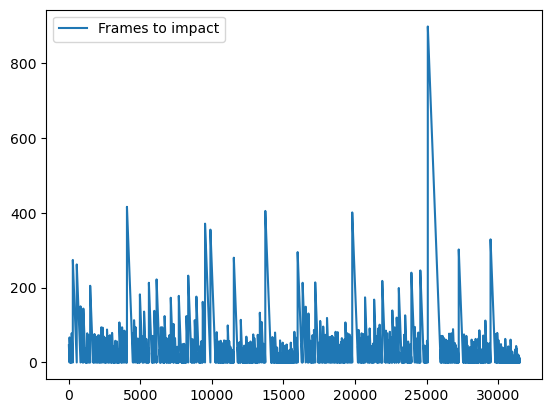

In [3]:
import matplotlib.pyplot as plt

plt.plot(df['Count'], label='Frames to impact')
plt.legend()
plt.show()

In [12]:
df_Q = pd.read_csv("Combined_numerated.csv")
df_R = pd.read_csv("training_file_paths_1.csv")
R=0
for Q in range(df_Q.shape[0]):
    if df_Q['File Name'][Q] == 'image_0000245.jpg':
        R = 0
    while df_Q['File Name'][Q] != df_R['File Name'][R]:
        R+=1 # file names are in order
    
    df_Q['s'][Q] = df_R['s'][R]





C:\Users\Quinn Leydon\AppData\Local\Temp\ipykernel_24248\2674566650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q['s'][Q] = df_R['s'][R]


In [13]:
for i in range(1,df_Q.shape[0]):
    if df_Q['s'][i] < df_Q['s'][i-1]:
        df_Q['dt'][i] = df_Q['s'][i] - df_Q['s'][i-1] + 60
    else:
        df_Q['dt'][i] = df_Q['s'][i] - df_Q['s'][i-1]
        

C:\Users\Quinn Leydon\AppData\Local\Temp\ipykernel_24248\2091789475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q['dt'][i] = df_Q['s'][i] - df_Q['s'][i-1]
C:\Users\Quinn Leydon\AppData\Local\Temp\ipykernel_24248\2091789475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q['dt'][i] = df_Q['s'][i] - df_Q['s'][i-1] + 60


In [14]:

df_Q.to_csv(path_or_buf='Final.csv', index=False)
